<a href="https://colab.research.google.com/github/prantoran/ai-prac/blob/master/py_torch/torchnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
print("DATA_PATH:", DATA_PATH)
PATH = DATA_PATH / "mnist"
print("PATH:", PATH)
PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

DATA_PATH: data
PATH: data/mnist


In [2]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


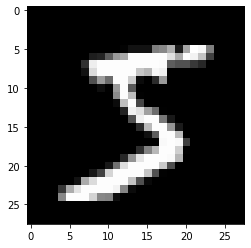

In [3]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

In [4]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
# x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


In [14]:
import math

weights = torch.randn(784, 10) / math.sqrt(784) # Xaview initialization
# by multiplying with 1/sqrt(n)
# shape: torch.Size([784, 10])

# records all operations to be used during backpropagation
# suffix _ indicates in-place operation
# turned on after initialization above so that initialization not recorded
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)
# bias shape: torch.Size([10])

In [18]:
# activation function
def log_softmax(x):
    # x: torch.Tensor
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    # xb expected to be type torch.Tensor
    return log_softmax(xb @ weights + bias)

In [29]:

# @ dot product operation
# 1 forward pass: calling our func on 1 batch of data (in this case, 64 images)

bs = 64  # batch size

xb = x_train[0:bs]  # a mini-batch from x
# xb: torch.Tensor

preds = model(xb)  # predictions
preds[0], preds.shape
print(preds[0], preds.shape)


# tensor contains not only the tensor values, but also a gradient function. 
  # We’ll use this later to do backprop.

tensor([-2.1648, -2.6249, -2.4690, -1.8716, -2.5731, -2.1278, -2.4795, -2.0327,
        -3.2633, -2.0729], grad_fn=<SelectBackward>) torch.Size([64, 10])


In [30]:
# loss func: negative log likelihood
def nll(input, target):
  # target.shape: torch.Size([64]) target.shape[0]: 64
  # type(input): <class 'torch.Tensor'>
  # type(target): <class 'torch.Tensor'>
  # input.shape: torch.Size([64, 10])
  # input[range(target.shape[0]), target]
    # access the probabilities prediced for each label in target
      # for each record in the input input
      # and represent the predicted values for the target labels
      # as a 1D torch.Tensor
  return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [31]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.3128, grad_fn=<NegBackward>)


In [32]:
# For each prediction, if the index with the largest value matches the target
  # value, then the prediction was correct.
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1) # dim=1 finds argmax per row/record
    return (preds == yb).float().mean()


In [33]:
print(accuracy(preds, yb))

tensor(0.0625)


In [42]:
print(preds.shape)

torch.Size([64, 10])


In [ ]:
# We can now run a training loop. For each iteration, we will:

#     select a mini-batch of data (of size bs)
#     use the model to make predictions
#     calculate the loss
#     loss.backward() updates the gradients of the model, 
      # in this case, weights and bias.

# We now use these gradients to update the weights and bias. We do this within 
  # the torch.no_grad() context manager, because we do not want these actions 
  # to be recorded for our next calculation of the gradient. 

# We then set the gradients to zero, so that we are ready for the next loop. 
  # Otherwise, our gradients would record a running tally of all the operations 
  # that had happened (i.e. loss.backward() adds the gradients to 
  # whatever is already stored, rather than replacing them).

from IPython.core.debugger import set_trace

lr = 0.5  # learning rate
epochs = 2  # how many epochs to train for

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        # set_trace()


        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

> <ipython-input-43-1b8e5a2a3e45>(26)<module>()
     24     for i in range((n - 1) // bs + 1):
     25         set_trace()
---> 26         start_i = i * bs
     27         end_i = start_i + bs
     28         xb = x_train[start_i:end_i]

ipdb> 
ipdb> 
ipdb> 
ipdb> 
ipdb> 
ipdb> 
ipdb> 
ipdb> 
ipdb> 
ipdb> 
ipdb> 
ipdb> 
ipdb> 
ipdb> 
ipdb> 
ipdb> 
ipdb> 
ipdb> 
ipdb> 
ipdb> 
ipdb> 
--KeyboardInterrupt--
--KeyboardInterrupt--
